In [43]:
import pandas as pd
import numpy as np
df = pd.read_csv("D:\\Excelr_assignments\\Recommendation System\\Recommendation System\\anime.csv")
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [44]:
df.shape

(12294, 7)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [46]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [70]:
len(df)

10156

In [72]:
len(df.anime_id.unique())

10156

In [47]:
df["genre"].mode()

0    Hentai
Name: genre, dtype: object

In [48]:
df["type"].mode()

0    TV
Name: type, dtype: object

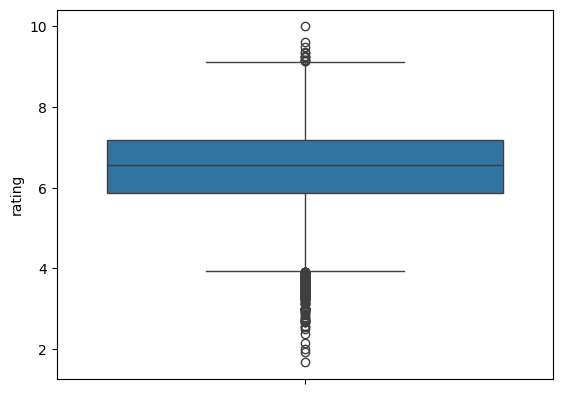

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(df["rating"])
plt.show()

In [69]:
df['rating'].value_counts()

rating
6.57    268
6.00    138
7.00     94
6.50     84
6.25     82
       ... 
8.27      1
8.08      1
8.02      1
4.19      1
8.69      1
Name: count, Length: 442, dtype: int64

<Axes: >

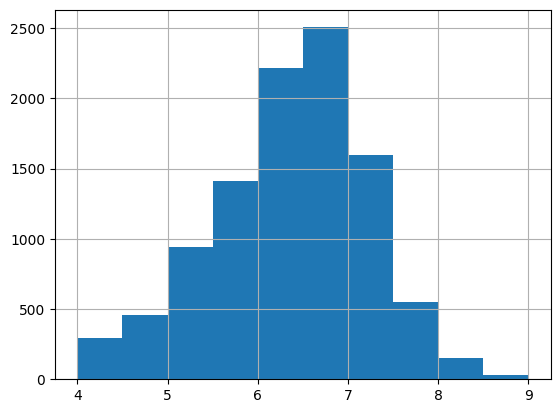

In [68]:
df['rating'].hist()

# we can see the skewedness in the rating, that means there are outlayers in the rating column:


<Axes: ylabel='members'>

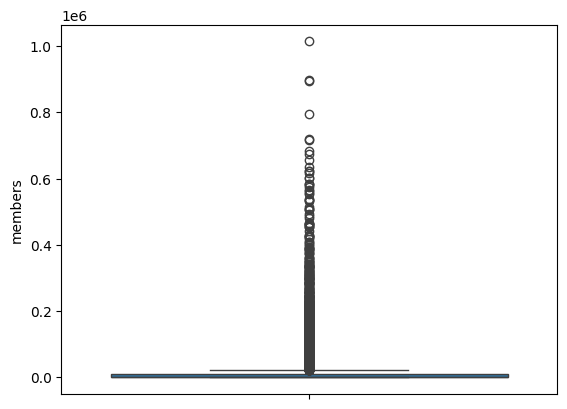

In [51]:
sns.boxplot(df["members"])

In [52]:
# filling the missing values in the  dataset : 

df["genre"].fillna(df["genre"].mode()[0], inplace=True)
df["type"].fillna(df["type"].mode()[0], inplace=True)
df["rating"].fillna(df["rating"].median(), inplace=True)


C:\Users\dell\AppData\Local\Temp\ipykernel_16112\1166790487.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["genre"].fillna(df["genre"].mode()[0], inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_16112\1166790487.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [53]:
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [54]:
df[["rating","members"]]

,rating,members
0,9.37,200630
1,9.26,793665
2,9.25,114262
3,9.17,673572
4,9.16,151266
...,...,...
12289,4.15,211
12290,4.28,183
12291,4.88,219
12292,4.98,175


In [55]:
# removing the outlayers from the data set:

q1 = df[["rating","members"]].quantile(0.25)
q3 = df[["rating","members"]].quantile(0.75)
iqr = q3-q1
df = df[
        ~((df[["rating","members"]].lt(q1 - 1.5 * iqr)) | (df[["rating","members"]].gt(q3 + 1.5 * iqr))).any(axis=1)
]

In [56]:
df.reset_index(drop=True, inplace=True)


<Axes: ylabel='rating'>

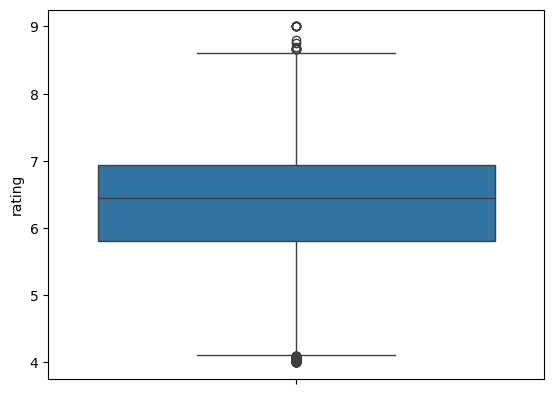

In [57]:
sns.boxplot(df["rating"])

<Axes: ylabel='members'>

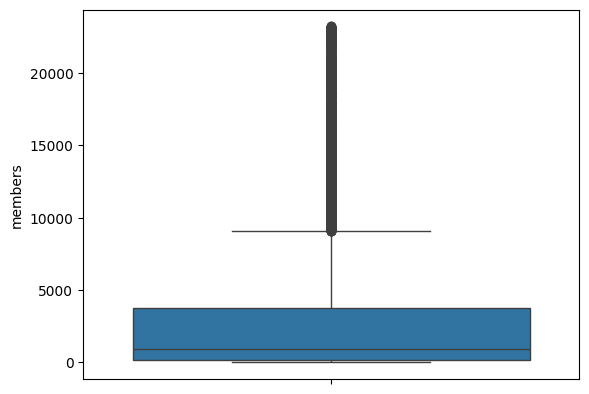

In [58]:
sns.boxplot(df["members"])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10156 entries, 0 to 10155
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  10156 non-null  int64  
 1   name      10156 non-null  object 
 2   genre     10156 non-null  object 
 3   type      10156 non-null  object 
 4   episodes  10156 non-null  object 
 5   rating    10156 non-null  float64
 6   members   10156 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 555.5+ KB


In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

columns = ["genre","type","episodes"]
for col in columns:
    df[col] = le.fit_transform(df[col])

df.head()


,anime_id,name,genre,type,episodes,rating,members
0,32366,Gintama°: Aizome Kaori-hen,1725,3,61,8.69,16947
1,21899,Gintama: Yorinuki Gintama-san on Theater 2D,407,0,61,8.60,11104
2,11917,Major: World Series,1416,3,61,8.50,13405
3,2921,Ashita no Joe 2,2160,5,107,8.48,6259
4,2559,Romeo no Aoi Sora,1130,5,88,8.47,15074


In [61]:
# Feature Extraction:

selected_features = df[["genre", "type", "rating", "members"]].copy()

# Step 3: Normalize numerical features.
from sklearn.preprocessing import MinMaxScaler

numerical_cols = ["rating", "members"]
scaler = MinMaxScaler()
selected_features[numerical_cols] = scaler.fit_transform(selected_features[numerical_cols])

# Final feature matrix ready for similarity computation
print(selected_features.head())


   genre  type  rating   members
0   1725     3   0.938  0.729787
1    407     0   0.920  0.478096
2   1416     3   0.900  0.577213
3   2160     5   0.896  0.269395
4   1130     5   0.894  0.649106


In [62]:
selected_features.shape

(10156, 4)

In [63]:
# Recommendation System:

from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(selected_features)
target_index = 10
similarity_scores = list(enumerate(cosine_sim[target_index]))
similar_anime = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
similar_anime = [x for x in similar_anime if x[0] != target_index]
threshold = 0.4
top_n = 5
top_recommendations = [x for x in similar_anime if x[1] >= threshold][:top_n]

# Step 7: Display results
print(f"Recommendations for Anime: {df.loc[target_index, 'name']}\n")
for idx, score in top_recommendations:
    print(f"{df.loc[idx, 'name']} (Similarity: {score:.2f})") 


Recommendations for Anime: Detective Conan Movie 20: The Darkest Nightmare

Buki yo Saraba (Similarity: 1.00)
Tenjou-jin to Akuto-jin Saigo no Tatakai (Similarity: 1.00)
Lupin III: Pilot Film (Similarity: 1.00)
Transformers the Movie (Similarity: 1.00)
Windaria (Similarity: 1.00)


In [65]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% test)
train_df, test_df, train_feat, test_feat = train_test_split(
    df, selected_features, test_size=0.2, random_state=42
)

In [66]:
# Cosine similarity on training data
cos_sim = cosine_similarity(train_feat)

# Evaluate recommendations
correct = 0
for i in range(len(test_df)):
    test_vec = test_feat.iloc[i].values.reshape(1, -1)
    sims = cosine_similarity(test_vec, train_feat).flatten()
    top_indices = sims.argsort()[::-1][:5]
    top_genres = train_df.iloc[top_indices]["genre"].values
    if test_df.iloc[i]["genre"] in top_genres:
        correct += 1

In [67]:
# Metrics
total = len(test_df)
precision = recall = correct / total
f1 = 2 * precision * recall / (precision + recall + 1e-10)

print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")


Precision: 0.42
Recall:    0.42
F1 Score:  0.42


1.
-->User-Based Collaborative Filtering:
Recommends items to a user based on the preferences of similar users.
It finds users with similar tastes and suggests items those users liked.
For example: If User A and User B both liked anime X and Y, and User B also liked anime Z, then Z is recommended to User A.

-->Item-Based Collaborative Filtering:
Recommends items that are similar to the items the user has already liked.
It focuses on item similarity based on user interaction history.
For example: If many users who liked anime X also liked anime Y, then Y is recommended to users who liked X.


2.Collaborative Filtering is a recommendation technique that makes predictions about a user's interests by collecting preferences from many users.

How it works:
It assumes that if users agree in the past, they'll likely agree again.
Uses a user-item interaction matrix (ratings, likes, views, etc.)
Based on similarity (using cosine similarity, Pearson correlation, etc.)

Types:
User-based Collaborative Filtering
Item-based Collaborative Filtering
Model-based Collaborative Filtering (e.g., using matrix factorization like SVD)

